<a href="https://colab.research.google.com/github/kaitlynrv/regression-repo/blob/main/prosperity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/WorldBank2002_2.csv')

In [ ]:
df.head()

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Net barter terms of trade (2000,Official development assistance,"Personal computers (per 1,000 p",Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
0,Angola,46,8,1,78,7,15,1672000000,10834800000,14,...,89,421369984,2,3,14618782,27,1208400000,1246700,6.41346,11.726
1,Benin,30,34,0,14,6,37,18000000,2807360000,5,...,88,216290000,2,3,7666962,53,73600000,112620,5.79909,68.078
2,Botswana,46,3,2,46,3,326,403000000,5423320000,5,...,97,37560000,40,0,1771008,46,16000000,581730,7.90101,3.044
3,Burkina Faso,39,31,0,8,7,15,15026000,3203350000,4,...,91,472729984,2,3,12022321,51,12900000,274000,5.52146,43.877
4,Burundi,91,41,0,6,7,11,1000,628096000,4,...,76,172120000,1,3,6818131,41,96300000,27830,4.60517,244.992


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Series                           47 non-null     object 
 1   Agricultural land (% of land ar  47 non-null     int64  
 2   Agriculture, value added (% of   47 non-null     object 
 3   CO2 emissions (metric tons per   47 non-null     object 
 4   Exports of goods and services (  47 non-null     object 
 5   Fertility rate, total (births p  47 non-null     object 
 6   Fixed line and mobile phone sub  47 non-null     object 
 7   Foreign direct investment, net   47 non-null     object 
 8   GDP (current US$)                47 non-null     object 
 9   GDP growth (annual %)            47 non-null     object 
 10  GNI per capita, Atlas method (c  47 non-null     object 
 11  GNI, Atlas method (current US$)  47 non-null     object 
 12  Gross capital formation 

In [ ]:
df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Personal computers (per 1,000 p', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added 

## Prepare Data for Analysis

In [ ]:
num_col = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Personal computers (per 1,000 p', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']


for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert the specified columns to float
df[num_col] = df[num_col].astype(float)

In [ ]:
df.isnull().sum()

Series                              0
Agricultural land (% of land ar     0
Agriculture, value added (% of      1
CO2 emissions (metric tons per      2
Exports of goods and services (     3
Fertility rate, total (births p     2
Fixed line and mobile phone sub     1
Foreign direct investment, net      1
GDP (current US$)                   1
GDP growth (annual %)               1
GNI per capita, Atlas method (c     2
GNI, Atlas method (current US$)     2
Gross capital formation (% of G     3
Immunization, measles (% of chi     0
Imports of goods and services (     4
Industry, value added (% of GDP     1
Inflation, GDP deflator (annual     1
Internet users (per 1,000 peopl     1
Life expectancy at birth, total     0
Long-term debt (DOD, current US     1
Merchandise trade (% of GDP)        1
Military expenditure (% of GDP)    13
Net barter terms of trade (2000     2
Official development assistance     0
Personal computers (per 1,000 p     7
Population growth (annual %)        0
Population, 

47 entries
Drop Military expenditure since more than 20% null
Drop Personal Computers bc close to 20% and data set so small

In [ ]:
df = df.drop('Military expenditure (% of GDP)', axis=1)

In [ ]:
df.isnull().sum()

Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     1
CO2 emissions (metric tons per     2
Exports of goods and services (    3
Fertility rate, total (births p    2
Fixed line and mobile phone sub    1
Foreign direct investment, net     1
GDP (current US$)                  1
GDP growth (annual %)              1
GNI per capita, Atlas method (c    2
GNI, Atlas method (current US$)    2
Gross capital formation (% of G    3
Immunization, measles (% of chi    0
Imports of goods and services (    4
Industry, value added (% of GDP    1
Inflation, GDP deflator (annual    1
Internet users (per 1,000 peopl    1
Life expectancy at birth, total    0
Long-term debt (DOD, current US    1
Merchandise trade (% of GDP)       1
Net barter terms of trade (2000    2
Official development assistance    0
Personal computers (per 1,000 p    7
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     1
S

In [ ]:
#check nulls per row
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      2
9      0
10     1
11     0
12     0
13     6
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     2
23     4
24     1
25     0
26     0
27     3
28     0
29     0
30     3
31     0
32     0
33     1
34     1
35     0
36     0
37     1
38    15
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
dtype: int64

In [ ]:
#drop row 38
df = df.drop(38)
df.isnull().sum()

Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     0
CO2 emissions (metric tons per     1
Exports of goods and services (    2
Fertility rate, total (births p    2
Fixed line and mobile phone sub    1
Foreign direct investment, net     1
GDP (current US$)                  0
GDP growth (annual %)              0
GNI per capita, Atlas method (c    1
GNI, Atlas method (current US$)    1
Gross capital formation (% of G    2
Immunization, measles (% of chi    0
Imports of goods and services (    3
Industry, value added (% of GDP    0
Inflation, GDP deflator (annual    0
Internet users (per 1,000 peopl    1
Life expectancy at birth, total    0
Long-term debt (DOD, current US    1
Merchandise trade (% of GDP)       0
Net barter terms of trade (2000    1
Official development assistance    0
Personal computers (per 1,000 p    7
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     0
S

In [ ]:
#drop Personal Computer
df = df.drop('Personal computers (per 1,000 p', axis = 1)

In [ ]:
df.isnull().sum()

Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     0
CO2 emissions (metric tons per     1
Exports of goods and services (    2
Fertility rate, total (births p    2
Fixed line and mobile phone sub    1
Foreign direct investment, net     1
GDP (current US$)                  0
GDP growth (annual %)              0
GNI per capita, Atlas method (c    1
GNI, Atlas method (current US$)    1
Gross capital formation (% of G    2
Immunization, measles (% of chi    0
Imports of goods and services (    3
Industry, value added (% of GDP    0
Inflation, GDP deflator (annual    0
Internet users (per 1,000 peopl    1
Life expectancy at birth, total    0
Long-term debt (DOD, current US    1
Merchandise trade (% of GDP)       0
Net barter terms of trade (2000    1
Official development assistance    0
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     0
Short-term debt outstanding (DO    1
S

In [ ]:
df_filled = df.fillna(df.mean())

<ipython-input-105-939c007b6345>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


In [ ]:
df_filled.isnull().sum()

Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     0
CO2 emissions (metric tons per     0
Exports of goods and services (    0
Fertility rate, total (births p    0
Fixed line and mobile phone sub    0
Foreign direct investment, net     0
GDP (current US$)                  0
GDP growth (annual %)              0
GNI per capita, Atlas method (c    0
GNI, Atlas method (current US$)    0
Gross capital formation (% of G    0
Immunization, measles (% of chi    0
Imports of goods and services (    0
Industry, value added (% of GDP    0
Inflation, GDP deflator (annual    0
Internet users (per 1,000 peopl    0
Life expectancy at birth, total    0
Long-term debt (DOD, current US    0
Merchandise trade (% of GDP)       0
Net barter terms of trade (2000    0
Official development assistance    0
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     0
Short-term debt outstanding (DO    0
S

In [ ]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Series                           46 non-null     object 
 1   Agricultural land (% of land ar  46 non-null     float64
 2   Agriculture, value added (% of   46 non-null     float64
 3   CO2 emissions (metric tons per   46 non-null     float64
 4   Exports of goods and services (  46 non-null     float64
 5   Fertility rate, total (births p  46 non-null     float64
 6   Fixed line and mobile phone sub  46 non-null     float64
 7   Foreign direct investment, net   46 non-null     float64
 8   GDP (current US$)                46 non-null     float64
 9   GDP growth (annual %)            46 non-null     float64
 10  GNI per capita, Atlas method (c  46 non-null     float64
 11  GNI, Atlas method (current US$)  46 non-null     float64
 12  Gross capital formation 

In [ ]:
df_filled.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

In [ ]:
df_filled.describe()

,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (c",...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,4.600000e+01,4.600000e+01,46.000000,46.000000,...,46.000000,46.000000,4.600000e+01,46.000000,4.600000e+01,46.00000,4.600000e+01,4.600000e+01,46.000000,46.000000
mean,48.043478,28.173913,0.644444,31.863636,5.295455,88.355556,2.114272e+08,7.737991e+09,3.717391,772.888889,...,61.826087,94.288889,3.763965e+08,2.282609,1.493665e+07,45.00000,6.038378e+08,5.136326e+05,5.999886,76.457435
std,21.375954,16.718990,1.565681,21.520627,1.407591,153.622503,3.953434e+08,1.761304e+10,5.935442,1232.535999,...,37.770244,19.974008,4.326050e+08,0.910752,2.197939e+07,14.61354,1.335958e+09,5.928307e+05,1.002745,105.478554
min,8.000000,3.000000,0.000000,6.000000,2.000000,3.000000,1.000000e+03,5.355240e+07,-13.000000,90.000000,...,10.000000,30.000000,7.850000e+06,0.000000,8.370000e+04,5.00000,4.000000e+06,4.600000e+02,4.499810,2.378000
25%,31.000000,14.000000,0.000000,16.000000,4.000000,13.000000,9.750000e+06,1.063545e+09,1.250000,212.500000,...,33.250000,89.250000,5.998500e+07,2.000000,1.839802e+06,38.25000,3.267500e+07,4.128750e+04,5.358740,15.254250
50%,47.000000,29.500000,0.000000,27.000000,5.295455,28.500000,5.650000e+07,3.162625e+09,4.000000,325.000000,...,55.000000,93.000000,2.740300e+08,2.000000,8.710361e+06,45.00000,1.511500e+08,2.708350e+05,5.783705,39.212500
75%,62.750000,40.000000,0.911111,41.750000,6.000000,84.750000,2.355000e+08,5.772950e+09,5.000000,617.500000,...,77.750000,97.000000,4.613175e+08,3.000000,1.672156e+07,54.75000,6.332845e+08,8.186150e+05,6.396505,96.815750
max,91.000000,76.000000,8.000000,95.000000,8.000000,788.000000,1.874000e+09,1.110000e+11,27.000000,6840.000000,...,169.000000,186.000000,2.202720e+09,4.000000,1.231343e+08,77.00000,7.400000e+09,2.505810e+06,8.830540,593.137000


<ipython-input-110-e566954a74bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_filled.corr()


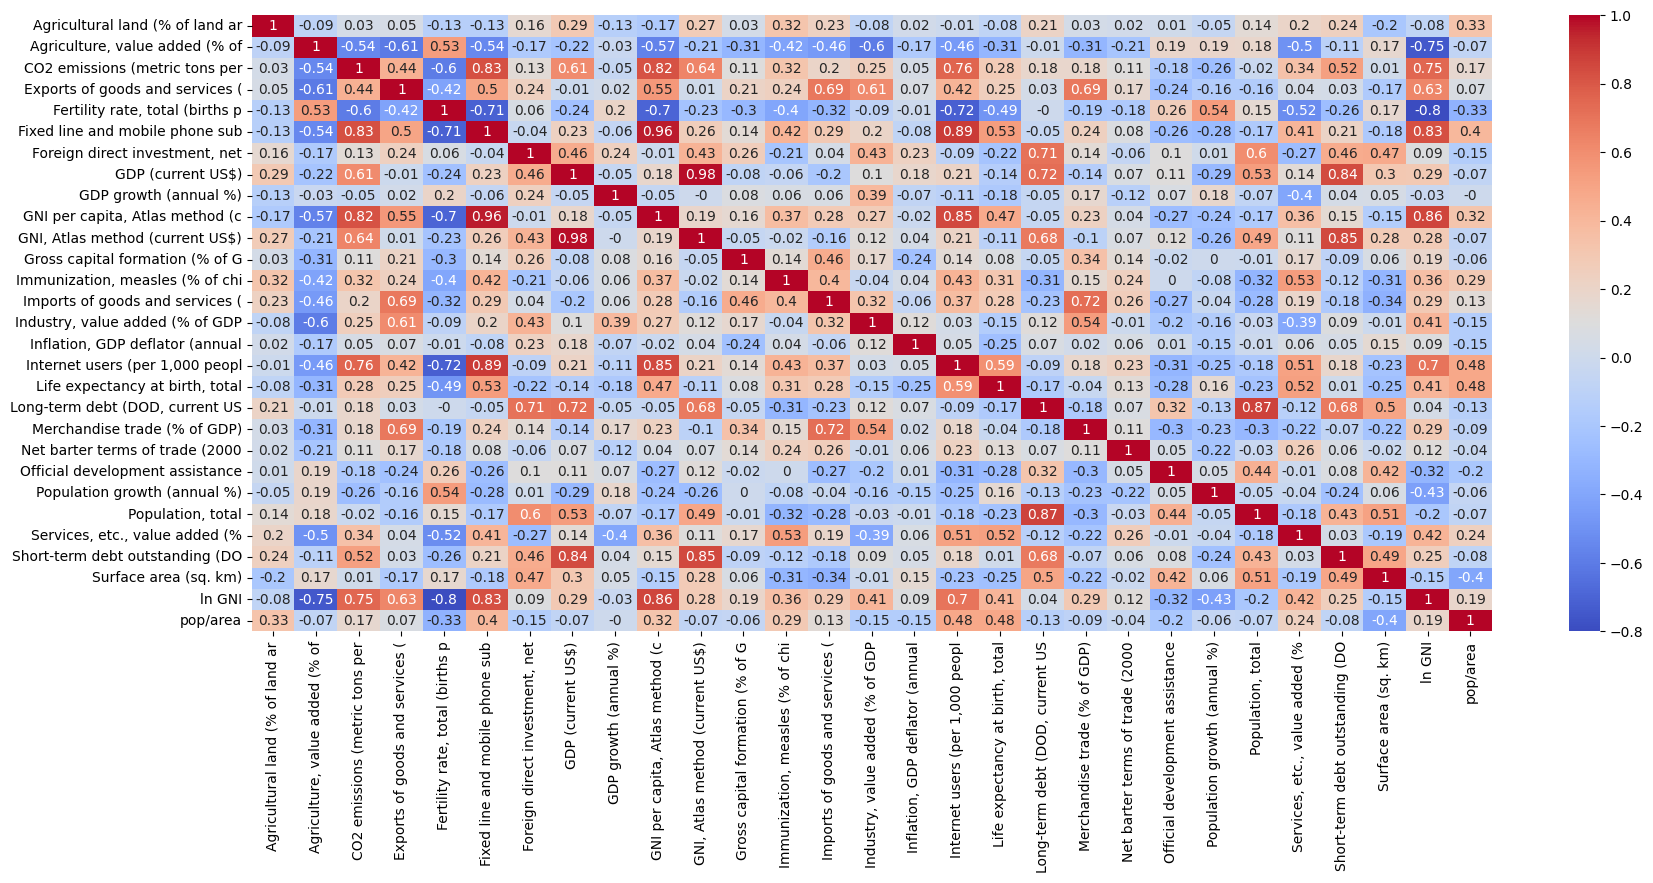

In [ ]:
# Compute correlations
cormat = df_filled.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (20,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

In [ ]:
num_col = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']

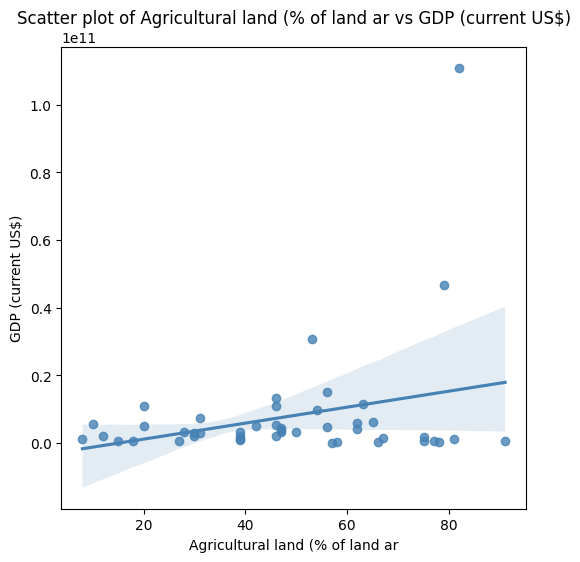

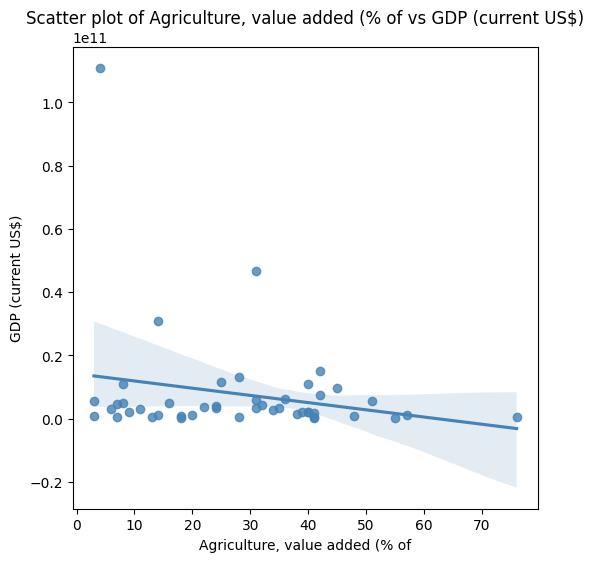

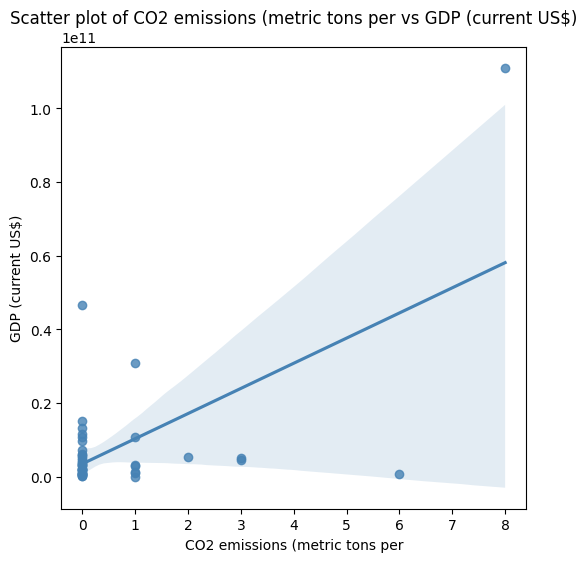

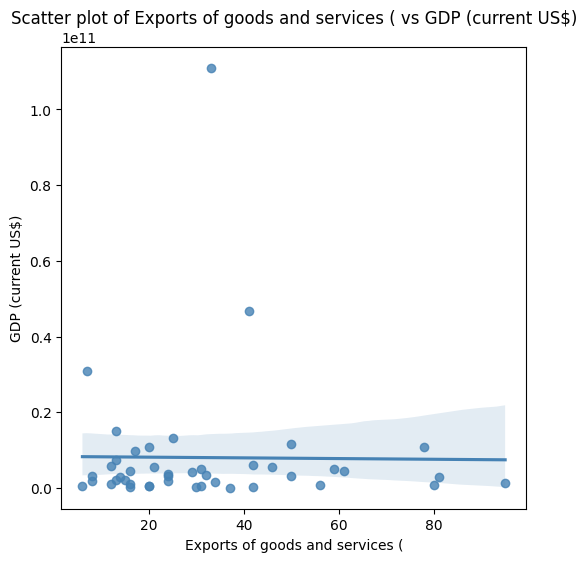

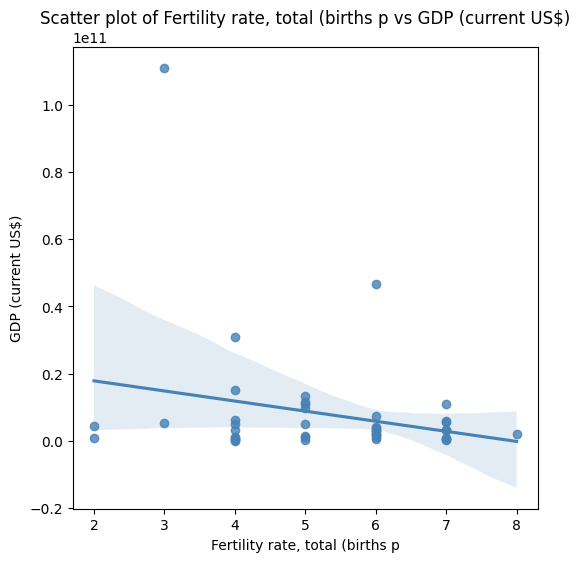

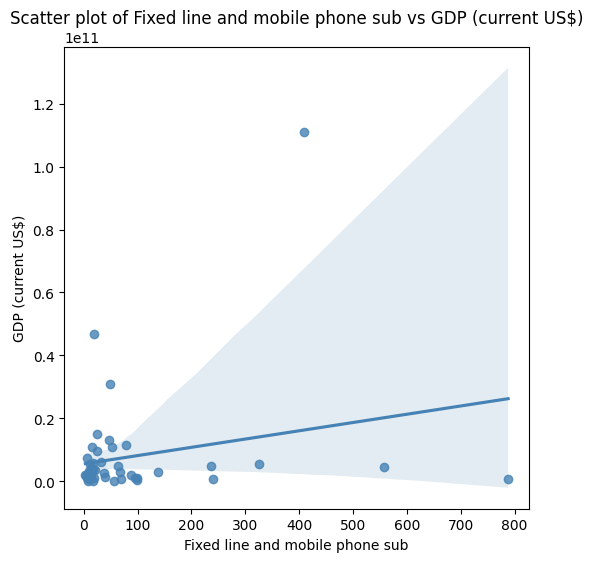

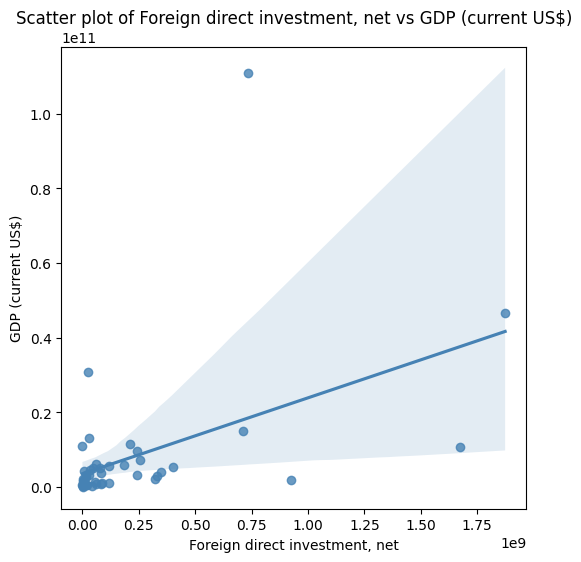

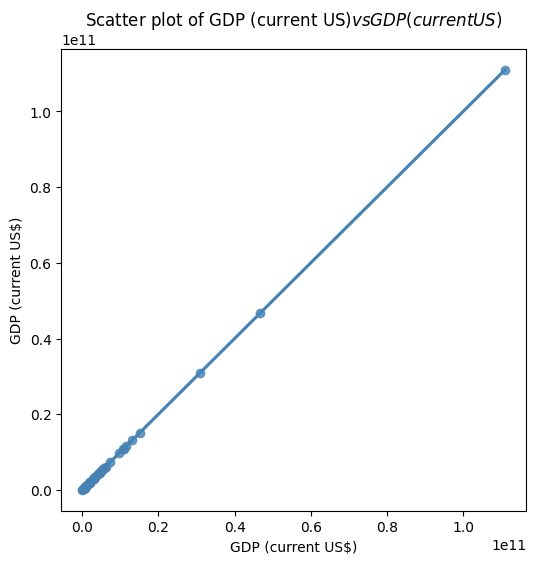

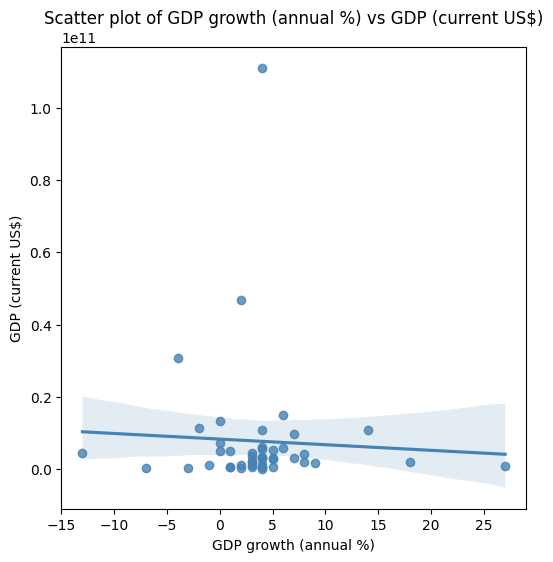

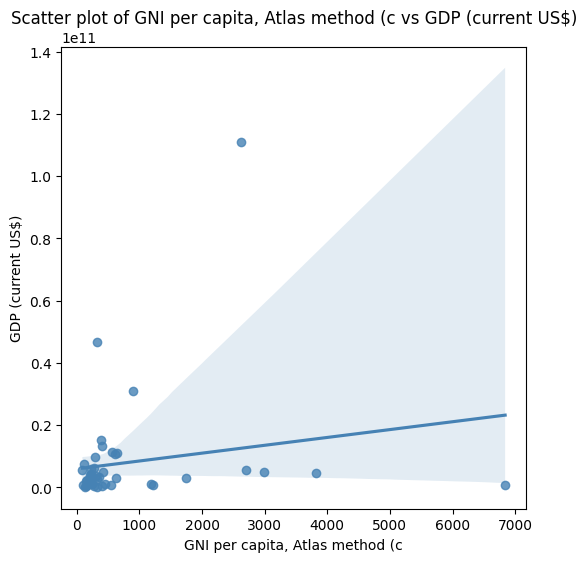

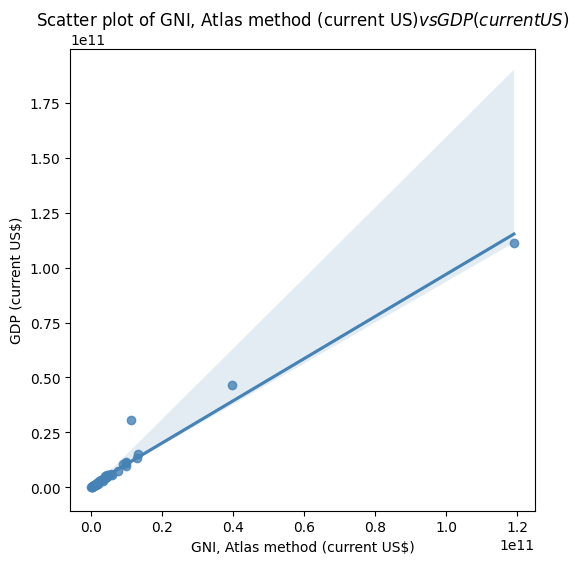

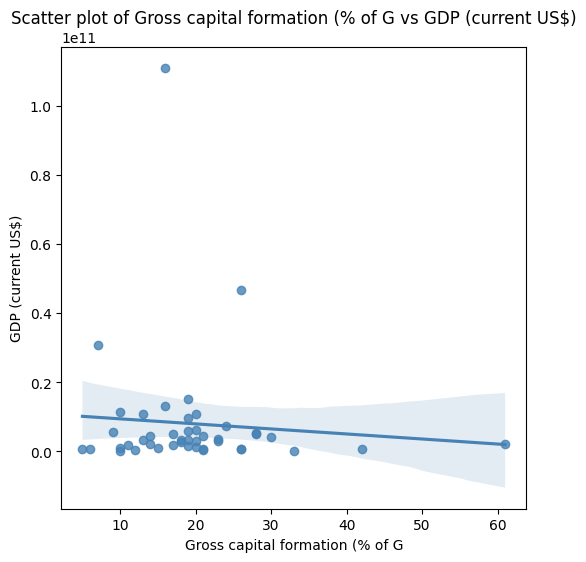

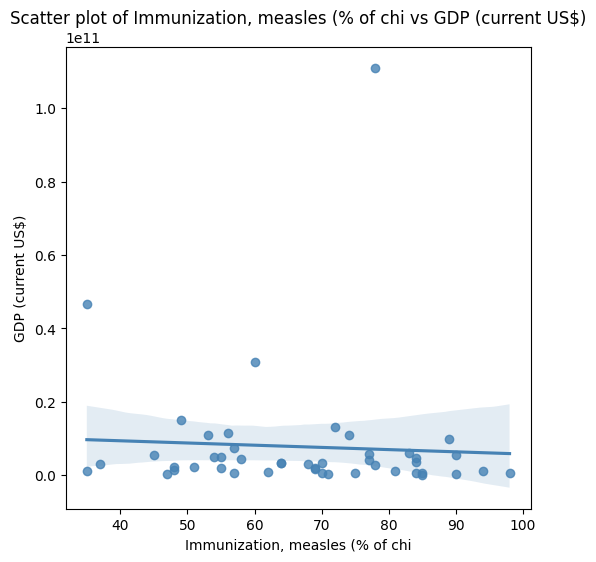

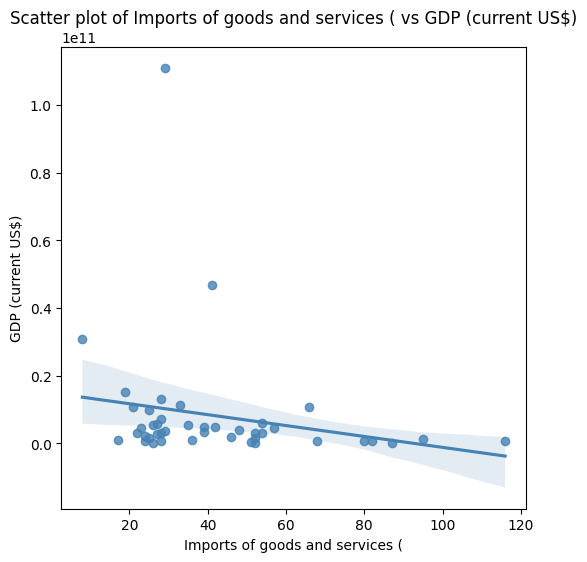

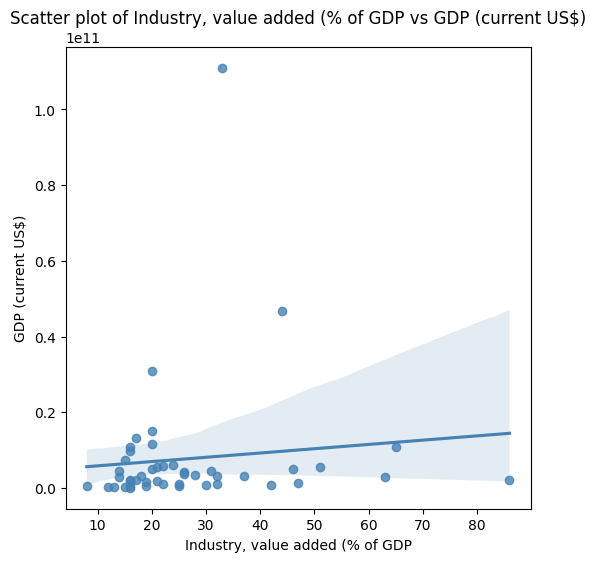

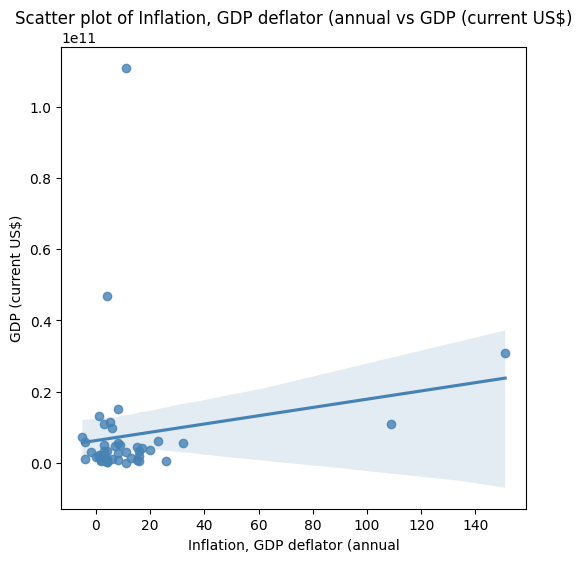

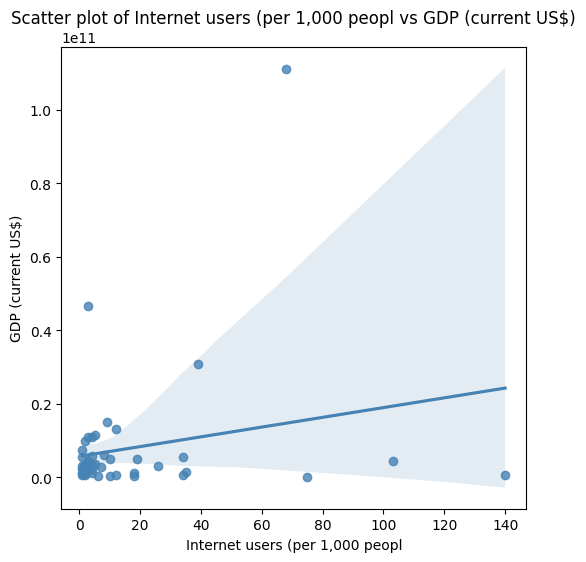

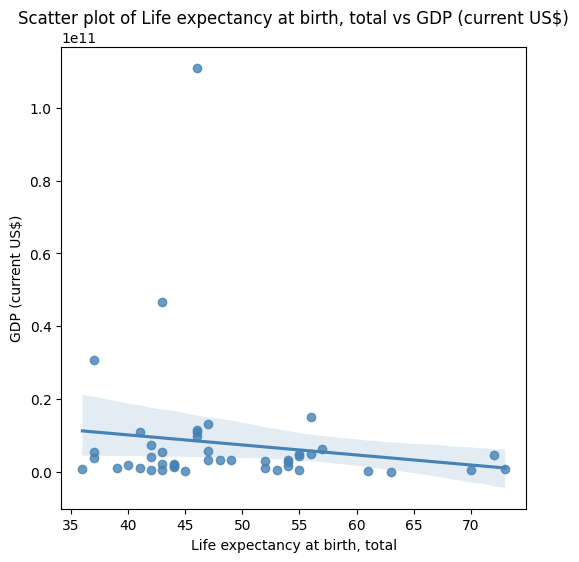

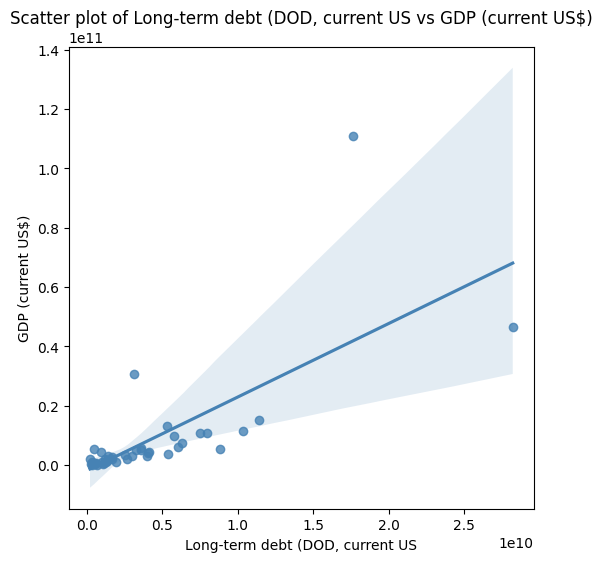

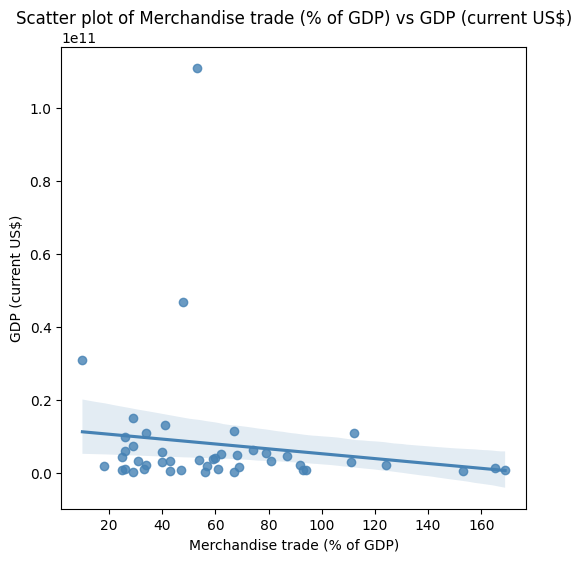

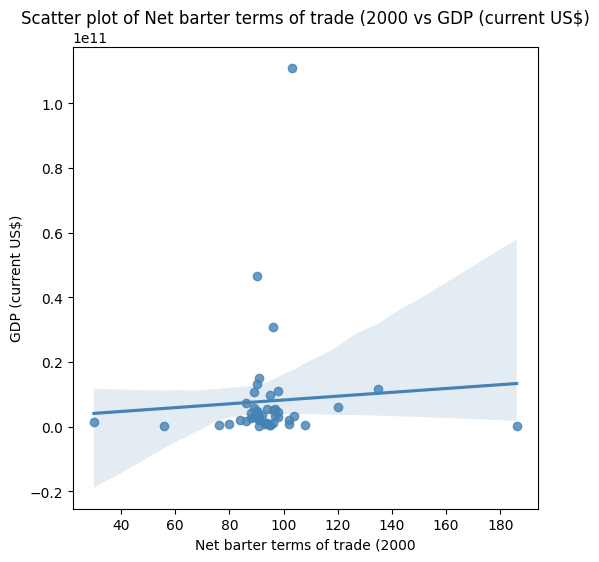

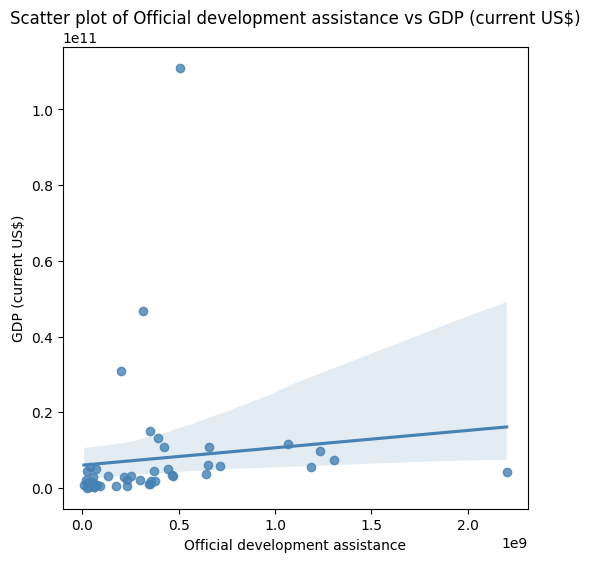

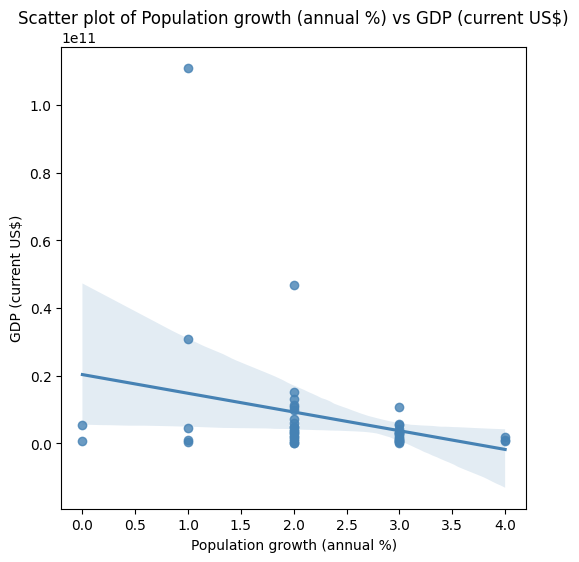

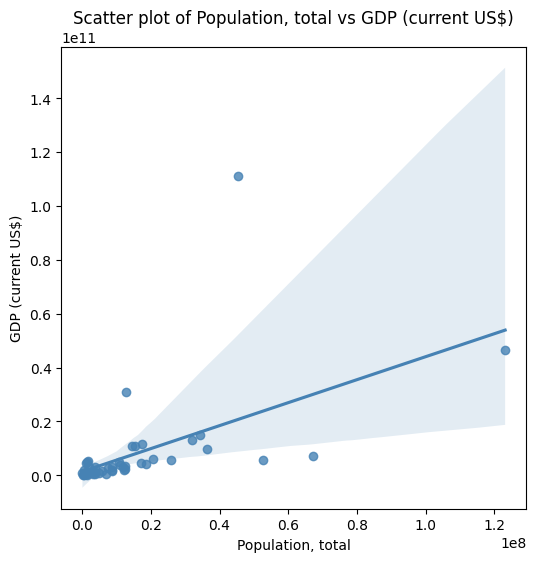

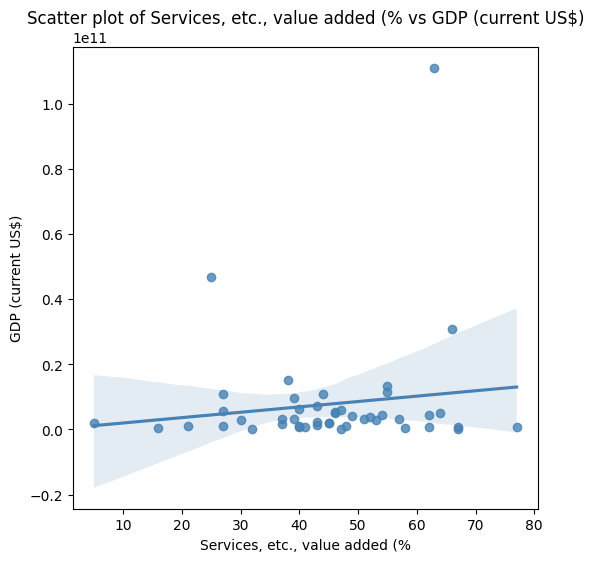

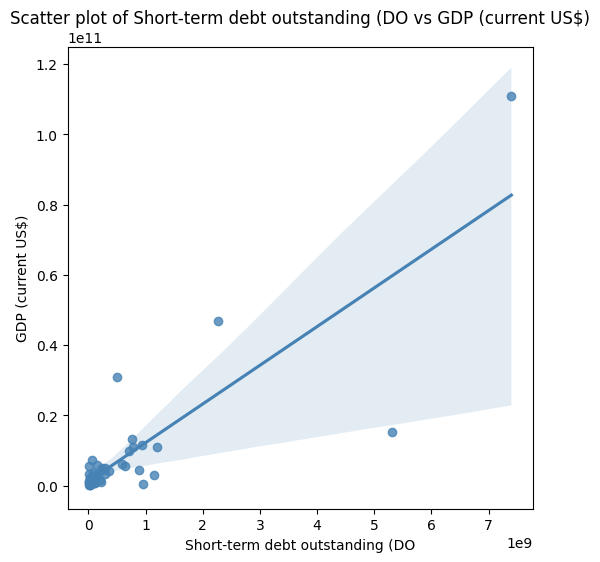

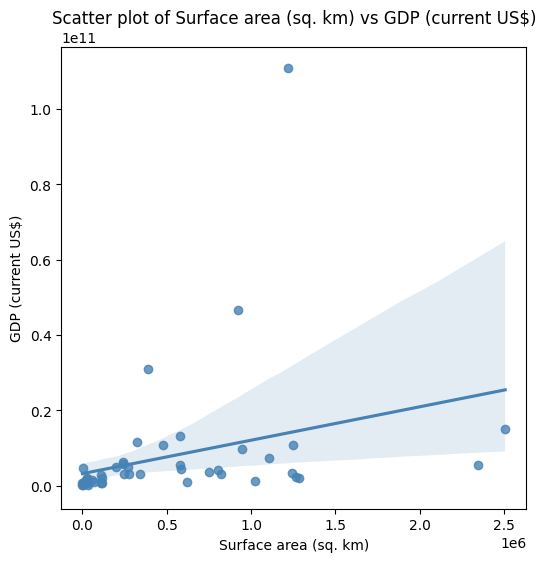

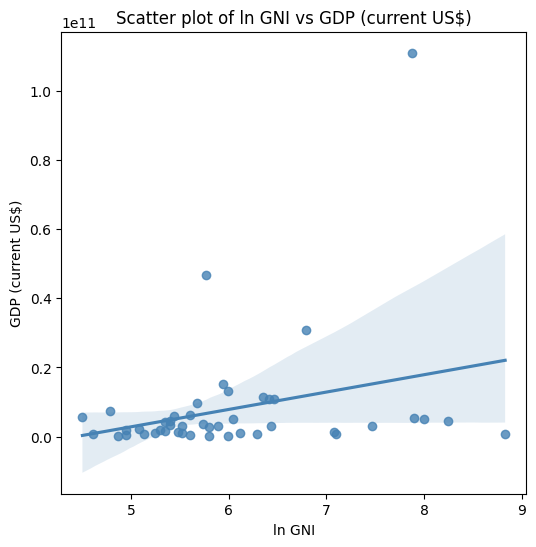

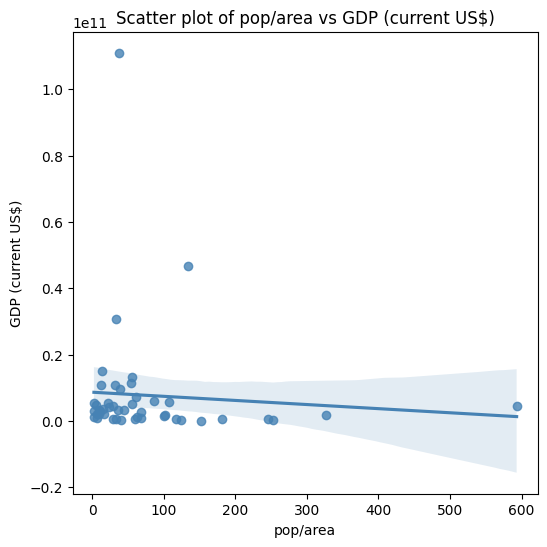

In [ ]:
target_variable = 'GDP (current US$)'

for col in num_col:
    plt.figure(figsize=(6, 6))
    sns.regplot(x=df[col], y=df[target_variable], color='steelblue')
    plt.title(f'Scatter plot of {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()

In [ ]:
df_filled.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

Terms for square:

'Agricultural land (% of land ar'

'Foreign direct investment, net'

'GDP growth (annual %)'

'GNI per capita, Atlas method (c'

 'Industry, value added (% of GDP'

 'Internet users (per 1,000 peopl'

'Long-term debt (DOD, current US'

'Net barter terms of trade (2000'

'Population, total'

'Surface area (sq. km)'

'ln GNI'

---
Terms for ln:

'Fixed line and mobile phone sub'



---
Terms for reciprocal:

'Agriculture, value added (% of'

'CO2 emissions (metric tons per'

'Fertility rate, total (births p'

'Imports of goods and services ('

'Life expectancy at birth, total'




In [ ]:
target_variable = 'GDP (current US$)'
features = ['Agricultural land (% of land ar',
            'Agriculture, value added (% of',
            'CO2 emissions (metric tons per',
            # Add more feature columns here...
           ]

X = df_filled[features]
y = df_filled[target_variable]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

residuals = model.resid
ols_influence = OLSInfluence(model)
standardized_residuals = ols_influence.resid_studentized_internal

threshold = 2.5
outliers = abs(standardized_residuals) > threshold
df_filled[outliers]

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
32,Nigeria,79.0,31.0,0.0,41.0,6.0,19.0,1.874000e+09,4.671080e+10,2.0,...,48.0,90.0,313820000.0,2.0,123134336.0,25.0,2.270200e+09,923770.0,5.76832,133.295
36,Seychelles,15.0,3.0,6.0,80.0,2.0,788.0,6.100000e+07,6.981750e+08,1.0,...,93.0,93.0,7850000.0,3.0,83700.0,67.0,1.075000e+08,460.0,8.83054,181.957
39,South Africa,82.0,4.0,8.0,33.0,3.0,409.0,7.350000e+08,1.110000e+11,4.0,...,53.0,103.0,505430016.0,1.0,45345288.0,63.0,7.400000e+09,1219090.0,7.87474,37.196


In [ ]:
df = df_filled.drop([32, 36, 39])

In [ ]:
df

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
0,Angola,46.0,8.0,1.000000,78.000000,7.000000,15.000000,1.672000e+09,1.083480e+10,14.0,...,112.0,89.000000,4.213700e+08,3.0,14618782.0,27.0,1.208400e+09,1246700.0,6.413460,11.726
1,Benin,30.0,34.0,0.000000,14.000000,6.000000,37.000000,1.800000e+07,2.807360e+09,5.0,...,40.0,88.000000,2.162900e+08,3.0,7666962.0,53.0,7.360000e+07,112620.0,5.799090,68.078
2,Botswana,46.0,3.0,2.000000,46.000000,3.000000,326.000000,4.030000e+08,5.423320e+09,5.0,...,79.0,97.000000,3.756000e+07,0.0,1771008.0,46.0,1.600000e+07,581730.0,7.901010,3.044
3,Burkina Faso,39.0,31.0,0.000000,8.000000,7.000000,15.000000,1.502600e+07,3.203350e+09,4.0,...,31.0,91.000000,4.727300e+08,3.0,12022321.0,51.0,1.290000e+07,274000.0,5.521460,43.877
4,Burundi,91.0,41.0,0.000000,6.000000,7.000000,11.000000,1.000000e+03,6.280960e+08,4.0,...,25.0,76.000000,1.721200e+08,3.0,6818131.0,41.0,9.630000e+07,27830.0,4.605170,244.992
5,Cameroon,20.0,40.0,0.000000,20.000000,5.000000,53.000000,1.000000e+03,1.087980e+10,4.0,...,34.0,98.000000,6.570600e+08,2.0,15454616.0,44.0,7.788000e+08,475440.0,6.461470,32.506
6,Cape Verde,18.0,7.0,0.000000,31.000000,4.000000,240.000000,1.500000e+07,6.162090e+08,5.0,...,47.0,95.000000,9.219000e+07,2.0,472372.0,77.0,2.520000e+07,4030.0,7.098380,117.214
7,Central African Republic,8.0,57.0,0.000000,12.000000,5.000000,6.000000,5.644000e+06,1.045930e+09,-1.0,...,26.0,93.000000,5.980000e+07,1.0,3887379.0,21.0,5.170000e+07,622980.0,5.521460,6.240
8,Chad,39.0,40.0,0.000000,13.000000,5.295455,5.000000,9.240600e+08,1.982260e+09,8.0,...,92.0,84.000000,2.289900e+08,4.0,8814445.0,45.0,2.570000e+07,1284000.0,5.298320,6.865
9,Comoros,66.0,41.0,0.000000,16.000000,4.000000,18.000000,4.300000e+05,2.467380e+08,2.0,...,29.0,56.000000,3.246000e+07,2.0,563633.0,47.0,2.960000e+07,2230.0,5.991460,252.750


In [ ]:
# Define your target variable and features
target_variable = 'GDP (current US$)'
features = ['Agricultural land (% of land ar',
            'Agriculture, value added (% of',
            'CO2 emissions (metric tons per',
            # Add more feature columns here...
           ]

# Prepare X and y
X = df[features]
y = df[target_variable]
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Calculate standardized residuals
ols_influence = OLSInfluence(model)
standardized_residuals = ols_influence.resid_studentized_internal

# Set a threshold for identifying outliers
threshold = 2.5  # Adjust as needed

# Identify outliers based on the threshold
outliers = abs(standardized_residuals) > threshold

# Print the rows with outliers
df[outliers]

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
46,Zimbabwe,53.0,14.0,1.0,7.0,4.0,49.0,25900000.0,3.085260e+10,-4.0,...,10.0,96.0,200550000.0,1.0,12785585.0,66.0,502000000.0,390760.0,6.79122,32.72


In [ ]:
df = df.drop(46)

In [ ]:
df

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
0,Angola,46.0,8.0,1.000000,78.000000,7.000000,15.000000,1.672000e+09,1.083480e+10,14.0,...,112.0,89.000000,4.213700e+08,3.0,14618782.0,27.0,1.208400e+09,1246700.0,6.413460,11.726
1,Benin,30.0,34.0,0.000000,14.000000,6.000000,37.000000,1.800000e+07,2.807360e+09,5.0,...,40.0,88.000000,2.162900e+08,3.0,7666962.0,53.0,7.360000e+07,112620.0,5.799090,68.078
2,Botswana,46.0,3.0,2.000000,46.000000,3.000000,326.000000,4.030000e+08,5.423320e+09,5.0,...,79.0,97.000000,3.756000e+07,0.0,1771008.0,46.0,1.600000e+07,581730.0,7.901010,3.044
3,Burkina Faso,39.0,31.0,0.000000,8.000000,7.000000,15.000000,1.502600e+07,3.203350e+09,4.0,...,31.0,91.000000,4.727300e+08,3.0,12022321.0,51.0,1.290000e+07,274000.0,5.521460,43.877
4,Burundi,91.0,41.0,0.000000,6.000000,7.000000,11.000000,1.000000e+03,6.280960e+08,4.0,...,25.0,76.000000,1.721200e+08,3.0,6818131.0,41.0,9.630000e+07,27830.0,4.605170,244.992
5,Cameroon,20.0,40.0,0.000000,20.000000,5.000000,53.000000,1.000000e+03,1.087980e+10,4.0,...,34.0,98.000000,6.570600e+08,2.0,15454616.0,44.0,7.788000e+08,475440.0,6.461470,32.506
6,Cape Verde,18.0,7.0,0.000000,31.000000,4.000000,240.000000,1.500000e+07,6.162090e+08,5.0,...,47.0,95.000000,9.219000e+07,2.0,472372.0,77.0,2.520000e+07,4030.0,7.098380,117.214
7,Central African Republic,8.0,57.0,0.000000,12.000000,5.000000,6.000000,5.644000e+06,1.045930e+09,-1.0,...,26.0,93.000000,5.980000e+07,1.0,3887379.0,21.0,5.170000e+07,622980.0,5.521460,6.240
8,Chad,39.0,40.0,0.000000,13.000000,5.295455,5.000000,9.240600e+08,1.982260e+09,8.0,...,92.0,84.000000,2.289900e+08,4.0,8814445.0,45.0,2.570000e+07,1284000.0,5.298320,6.865
9,Comoros,66.0,41.0,0.000000,16.000000,4.000000,18.000000,4.300000e+05,2.467380e+08,2.0,...,29.0,56.000000,3.246000e+07,2.0,563633.0,47.0,2.960000e+07,2230.0,5.991460,252.750


In [ ]:
# Define your target variable and features
target_variable = 'GDP (current US$)'
features = ['Agricultural land (% of land ar',
            'Agriculture, value added (% of',
            'CO2 emissions (metric tons per',
            # Add more feature columns here...
           ]

# Prepare X and y
X = df[features]
y = df[target_variable]
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Calculate standardized residuals
ols_influence = OLSInfluence(model)
standardized_residuals = ols_influence.resid_studentized_internal

# Set a threshold for identifying outliers
threshold = 2.5  # Adjust as needed

# Identify outliers based on the threshold
outliers = abs(standardized_residuals) > threshold

# Print the rows with outliers
df[outliers]

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
40,Sudan,56.0,42.0,0.0,13.0,4.0,25.0,713000000.0,1.510860e+10,6.0,...,29.0,91.0,350889984.0,2.0,34213148.0,38.0,5.305900e+09,2505810.0,5.94017,13.654


In [ ]:
df = df.drop(40)

In [ ]:
# Define your target variable and features
target_variable = 'GDP (current US$)'
features = ['Agricultural land (% of land ar',
            'Agriculture, value added (% of',
            'CO2 emissions (metric tons per',
            # Add more feature columns here...
           ]

# Prepare X and y
X = df[features]
y = df[target_variable]
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Calculate standardized residuals
ols_influence = OLSInfluence(model)
standardized_residuals = ols_influence.resid_studentized_internal

# Set a threshold for identifying outliers
threshold = 2.5  # Adjust as needed

# Identify outliers based on the threshold
outliers = abs(standardized_residuals) > threshold

# Print the rows with outliers
df[outliers]

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
21,Kenya,46.0,28.0,0.0,25.0,5.0,47.0,28000000.0,1.319230e+10,0.0,...,41.0,90.0,393510016.0,2.0,32039836.0,55.0,764899968.0,580370.0,5.99146,55.206


After continuously checking for outliers and dropping, we are left with 30 countries

Countries dropped:


*   Nigeria
*   Seychelles
*   South Africa
*   Zimbabwe
*   Sudan


Now that data is prepared we will conduct our regression analysis

## Regression Analysis

In [ ]:
# Perform linear regression
X = df.drop(columns=['Series','GDP (current US$)'])
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg1 = sm.OLS(y, X).fit()

print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     37.04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.35e-08
Time:                        19:39:44   Log-Likelihood:                -866.19
No. Observations:                  41   AIC:                             1790.
Df Residuals:                      12   BIC:                             1840.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

P values for all except GNI, Atlas method (current US$) are far too high

In [ ]:
threshold = 0.1
correlated_columns = cormat[(cormat['GDP (current US$)'] > threshold) | (cormat['GDP (current US$)'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'CO2 emissions (metric tons per', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GNI per capita, Atlas method (c',
       'GNI, Atlas method (current US$)', 'Imports of goods and services (',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Official development assistance',
       'Population growth (annual %)', 'Population, total',
       'Services, etc., value added (%', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln GNI'],
      dtype='object')

In [ ]:
# Perform linear regression 2 (col w abs(corr)>.1)
col2 = ['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'CO2 emissions (metric tons per', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GNI per capita, Atlas method (c',
       'GNI, Atlas method (current US$)', 'Imports of goods and services (',
       'Industry, value added (% of GDP', 'Inflation, GDP deflator (annual',
       'Internet users (per 1,000 peopl', 'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']

X = df[col2]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg2 = sm.OLS(y, X).fit()

print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     54.13
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           9.24e-13
Time:                        19:39:53   Log-Likelihood:                -873.63
No. Observations:                  41   AIC:                             1791.
Df Residuals:                      19   BIC:                             1829.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Pvals still way too high, make threshold .2

In [ ]:
threshold = 0.2
correlated_columns = cormat[(cormat['GDP (current US$)'] > threshold) | (cormat['GDP (current US$)'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'CO2 emissions (metric tons per', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GNI, Atlas method (current US$)',
       'Internet users (per 1,000 peopl', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI'],
      dtype='object')

In [ ]:
# Perform linear regression 2 (col w abs(corr)>.1)
col3 = ['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'CO2 emissions (metric tons per', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Imports of goods and services (', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI']

X = df[col3]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg3 = sm.OLS(y, X).fit()

print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     51.76
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.30e-15
Time:                        19:40:09   Log-Likelihood:                -888.91
No. Observations:                  41   AIC:                             1808.
Df Residuals:                      26   BIC:                             1834.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
threshold = 0.25
correlated_columns = cormat[(cormat['GDP (current US$)'] > threshold) | (cormat['GDP (current US$)'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net', 'GDP (current US$)',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI'],
      dtype='object')

In [ ]:
col4 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI']

X = df[col4]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg4 = sm.OLS(y, X).fit()

print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     70.33
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.99e-18
Time:                        19:40:15   Log-Likelihood:                -892.32
No. Observations:                  41   AIC:                             1807.
Df Residuals:                      30   BIC:                             1825.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop ln GNI
col5 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)']

X = df[col5]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg5 = sm.OLS(y, X).fit()

print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     79.50
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           6.73e-19
Time:                        19:40:18   Log-Likelihood:                -892.63
No. Observations:                  41   AIC:                             1805.
Df Residuals:                      31   BIC:                             1822.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop short term debt
col6 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Surface area (sq. km)']

X = df[col6]
y = df['GDP (current US$)']
reg6 = sm.OLS(y, X).fit()

print(reg6.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              198.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    1.26e-25
Time:                        19:40:22   Log-Likelihood:                         -894.12
No. Observations:                  41   AIC:                                      1804.
Df Residuals:                      33   BIC:                                      1818.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop Surface Area
col7 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total']

X = df[col7]
y = df['GDP (current US$)']
reg7 = sm.OLS(y, X).fit()

print(reg7.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              233.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    8.03e-27
Time:                        19:40:25   Log-Likelihood:                         -894.14
No. Observations:                  41   AIC:                                      1802.
Df Residuals:                      34   BIC:                                      1814.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

reg 7 is the best model yet

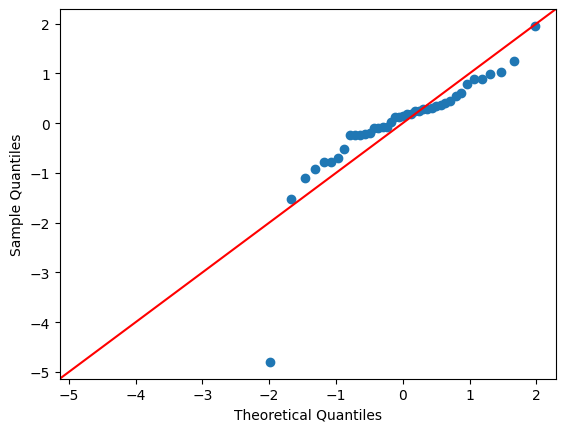

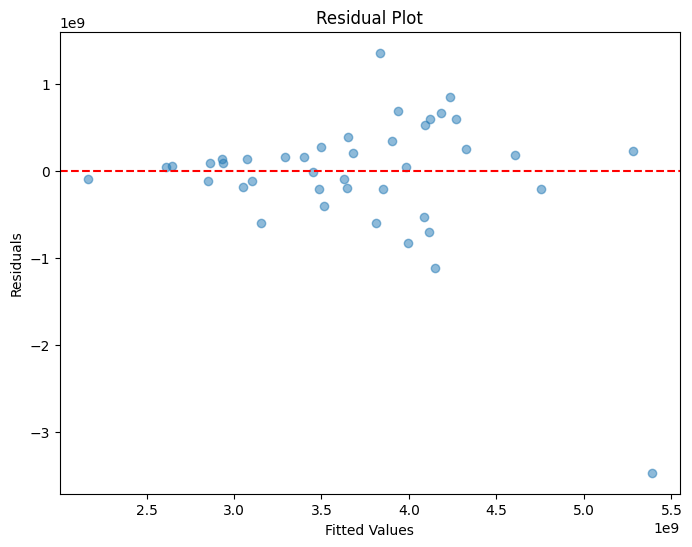

In [ ]:
residuals = reg7.resid

fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Pretty good, still some curviture

Next we will try regressions with variable transformations to see if that would help

In [ ]:
#Add ln col
df['ln_GDP'] = np.log(df['GDP (current US$)'])

In [ ]:
cormat = df.corr()
cormat = cormat.round(2)

<ipython-input-136-0db0800f3f9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


In [ ]:
# Perform ln linear regression
X = df.drop(columns=['Series','GDP (current US$)', 'ln_GDP'])
y =df['ln_GDP']
X = sm.add_constant(X)
lnreg1 = sm.OLS(y, X).fit()

print(lnreg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_GDP   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3.512
Date:                Sun, 10 Sep 2023   Prob (F-statistic):             0.0128
Time:                        19:40:40   Log-Likelihood:                -20.468
No. Observations:                  41   AIC:                             98.94
Df Residuals:                      12   BIC:                             148.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
threshold = 0.1
correlated_columns = cormat[(cormat['ln_GDP'] > threshold) | (cormat['ln_GDP'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'Foreign direct investment, net', 'GDP (current US$)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Immunization, measles (% of chi', 'Imports of goods and services (',
       'Industry, value added (% of GDP', 'Inflation, GDP deflator (annual',
       'Internet users (per 1,000 peopl', 'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Merchandise trade (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln GNI', 'pop/area', 'ln_GDP'],
      dtype='object')

In [ ]:
lncol1 = ['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'Exports of goods and services (', 'Foreign direct investment, net',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Immunization, measles (% of chi', 'Imports of goods and services (',
       'Industry, value added (% of GDP', 'Inflation, GDP deflator (annual',
       'Internet users (per 1,000 peopl', 'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']

X = df[lncol1]
y = df['GDP (current US$)']
X = sm.add_constant(X)
lnreg1 = sm.OLS(y, X).fit()

print(lnreg1.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     42.58
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           6.85e-11
Time:                        19:40:48   Log-Likelihood:                -874.39
No. Observations:                  41   AIC:                             1797.
Df Residuals:                      17   BIC:                             1838.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
threshold = 0.2
correlated_columns = cormat[(cormat['ln_GDP'] > threshold) | (cormat['ln_GDP'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'Foreign direct investment, net',
       'GDP (current US$)', 'GNI, Atlas method (current US$)',
       'Imports of goods and services (', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Official development assistance', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'ln_GDP'],
      dtype='object')

In [ ]:
lncol2 = ['Agricultural land (% of land ar', 'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Internet users (per 1,000 peopl', 'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']

X = df[lncol2]
y = df['GDP (current US$)']
lnreg2 = sm.OLS(y, X).fit()

print(lnreg2.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              143.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    4.34e-21
Time:                        19:40:55   Log-Likelihood:                         -883.17
No. Observations:                  41   AIC:                                      1796.
Df Residuals:                      26   BIC:                                      1822.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
threshold = 0.3
correlated_columns = cormat[(cormat['ln_GDP'] > threshold) | (cormat['ln_GDP'] < -threshold)]
correlated_columns.index

Index(['Foreign direct investment, net', 'GDP (current US$)',
       'GNI, Atlas method (current US$)', 'Imports of goods and services (',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln_GDP'],
      dtype='object')

In [ ]:
lncol3 = ['Agricultural land (% of land ar', 'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Imports of goods and services (', 'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)']

X = df[lncol3]
y = df['GDP (current US$)']
lnreg3 = sm.OLS(y, X).fit()

print(lnreg3.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              149.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    2.33e-23
Time:                        19:41:00   Log-Likelihood:                         -894.03
No. Observations:                  41   AIC:                                      1808.
Df Residuals:                      31   BIC:                                      1825.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop Imports of goods and services (
lncol4 = ['Agricultural land (% of land ar', 'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)']

X = df[lncol4]
y = df['GDP (current US$)']
lnreg4 = sm.OLS(y, X).fit()

print(lnreg4.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              166.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    2.71e-24
Time:                        19:41:08   Log-Likelihood:                         -894.62
No. Observations:                  41   AIC:                                      1807.
Df Residuals:                      32   BIC:                                      1823.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

We still are having to limit the variables the same as the above regular linear regression, lets try adding square and interaction terms

In [ ]:
print(cormat)

                                 Agricultural land (% of land ar  \
Agricultural land (% of land ar                             1.00   
Agriculture, value added (% of                             -0.11   
CO2 emissions (metric tons per                             -0.03   
Exports of goods and services (                             0.15   
Fertility rate, total (births p                            -0.18   
Fixed line and mobile phone sub                            -0.06   
Foreign direct investment, net                             -0.08   
GDP (current US$)                                          -0.15   
GDP growth (annual %)                                      -0.14   
GNI per capita, Atlas method (c                            -0.09   
GNI, Atlas method (current US$)                            -0.19   
Gross capital formation (% of G                             0.06   
Immunization, measles (% of chi                             0.54   
Imports of goods and services (                 

In [ ]:
df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

Potential Interactions:

'Agriculture, value added (% of' and 'CO2 emissions (metric tons per'

'Agriculture, value added (% of' and 'Exports of goods and services ('

'Agriculture, value added (% of' and 'Fixed line and mobile phone sub'

'Agriculture, value added (% of' and  'GNI per capita, Atlas method (c'

'CO2 emissions (metric tons per' and 'GNI per capita, Atlas method (c'

'CO2 emissions (metric tons per' and 'Fixed line and mobile phone sub'

'Exports of goods and services (' and 'Fixed line and mobile phone sub'

'Fixed line and mobile phone sub' and 'Fertility rate, total (births p'

------------

Non-linear w GDP:

'CO2 emissions (metric tons per'

'Exports of goods and services ('


In [ ]:
#create interactions based on correlations
df['Agriculture_CO2_interaction'] = df['Agriculture, value added (% of'] * df['CO2 emissions (metric tons per']
df['Agriculture_Exports_interaction'] = df['Agriculture, value added (% of'] * df['Exports of goods and services (']
df['CO2_GNI_interaction'] = df['CO2 emissions (metric tons per'] * df['GNI per capita, Atlas method (c']
df['GDP_growth_Internet_interaction'] = df['GDP growth (annual %)'] * df['Internet users (per 1,000 peopl']
df['Population_Surface_interaction'] = df['Population, total'] * df['Surface area (sq. km)']

#based on real world context
df['Agriculture_GDP_Growth_Interaction'] = df['Agriculture, value added (% of'] * df['GDP growth (annual %)']
df['CO2_Emissions_GDP_Growth_Interaction'] = df['CO2 emissions (metric tons per'] * df['GDP growth (annual %)']
df['Internet_Usage_Services_Interaction'] = df['Internet users (per 1,000 peopl'] * df['Services, etc., value added (%']
df['Population_Growth_Services_Interaction'] = df['Population growth (annual %)'] * df['Services, etc., value added (%']
df['Capital_Formation_Industrial_Interaction'] = df['Gross capital formation (% of G'] * df['Industry, value added (% of GDP']
df['GNI_ODA_Interaction'] = df['GNI per capita, Atlas method (c'] * df['Official development assistance']
df['Long_Short_Debt_Interaction'] = df['Long-term debt (DOD, current US'] * df['Short-term debt outstanding (DO']
df['CO2_Emissions_Agriculture_Interaction'] = df['CO2 emissions (metric tons per'] * df['Agriculture, value added (% of']
df['Fertility_Population_Growth_Interaction'] = df['Fertility rate, total (births p'] * df['Population growth (annual %)']

df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

In [ ]:
#regress
col8 = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area', 'Agriculture_CO2_interaction',
       'Agriculture_Exports_interaction', 'CO2_GNI_interaction',
       'GDP_growth_Internet_interaction', 'Population_Surface_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'CO2_Emissions_GDP_Growth_Interaction',
       'Internet_Usage_Services_Interaction',
       'Population_Growth_Services_Interaction',
       'Capital_Formation_Industrial_Interaction', 'GNI_ODA_Interaction',
       'Long_Short_Debt_Interaction', 'CO2_Emissions_Agriculture_Interaction',
       'Fertility_Population_Growth_Interaction']

X = df[col8]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg8 = sm.OLS(y, X).fit()

print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     95.06
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.79e-20
Time:                        19:41:20   Log-Likelihood:                -889.10
No. Observations:                  41   AIC:                             1798.
Df Residuals:                      31   BIC:                             1815.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## Adding Squares

In [ ]:
#create square terms
# List of columns for which you want to create square terms
columns_to_square = [
    'Agricultural land (% of land ar',
    'Foreign direct investment, net',
    'GDP growth (annual %)',
    'GNI per capita, Atlas method (c',
    'Industry, value added (% of GDP',
    'Internet users (per 1,000 peopl',
    'Long-term debt (DOD, current US',
    'Net barter terms of trade (2000',
    'Population, total',
    'Surface area (sq. km)',
    'ln GNI'
]

for col in columns_to_square:
    square_col = df[col] ** 2
    df[f'{col}_squared'] = square_col

df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

In [ ]:
#regress
col9 = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area', 'Agriculture_CO2_interaction',
       'Agriculture_Exports_interaction', 'CO2_GNI_interaction',
       'GDP_growth_Internet_interaction', 'Population_Surface_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'CO2_Emissions_GDP_Growth_Interaction',
       'Internet_Usage_Services_Interaction',
       'Population_Growth_Services_Interaction',
       'Capital_Formation_Industrial_Interaction', 'GNI_ODA_Interaction',
       'Long_Short_Debt_Interaction', 'CO2_Emissions_Agriculture_Interaction',
       'Fertility_Population_Growth_Interaction', 'Agricultural land (% of land ar_squared',
       'Foreign direct investment, net_squared',
       'GDP growth (annual %)_squared',
       'GNI per capita, Atlas method (c_squared',
       'Industry, value added (% of GDP_squared',
       'Internet users (per 1,000 peopl_squared',
       'Long-term debt (DOD, current US_squared',
       'Net barter terms of trade (2000_squared', 'Population, total_squared',
       'Surface area (sq. km)_squared', 'ln GNI_squared']

X = df[col9]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg9 = sm.OLS(y, X).fit()

print(reg9.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     118.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.65e-20
Time:                        19:41:30   Log-Likelihood:                -874.63
No. Observations:                  41   AIC:                             1777.
Df Residuals:                      27   BIC:                             1801.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
p_values = reg9.pvalues

# Find the variables with p-values above 0.25
variables_to_drop = p_values[p_values > 0.25].index
variables_to_drop


Index(['Foreign direct investment, net', 'Long-term debt (DOD, current US',
       'Long-term debt (DOD, current US_squared'],
      dtype='object')

In [ ]:
#regress
col10 = ['Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Immunization, measles (% of chi',
       'Imports of goods and services (',
       'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)',
       'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)',
       'pop/area', 'Agriculture_CO2_interaction',
       'Agriculture_Exports_interaction',
       'GDP_growth_Internet_interaction', 'Population_Surface_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'Internet_Usage_Services_Interaction',
       'Long_Short_Debt_Interaction', 'CO2_Emissions_Agriculture_Interaction',
       'Fertility_Population_Growth_Interaction', 'Agricultural land (% of land ar_squared',
       'Foreign direct investment, net_squared',
       'GDP growth (annual %)_squared',
       'GNI per capita, Atlas method (c_squared',
       'Internet users (per 1,000 peopl_squared',
       'Long-term debt (DOD, current US_squared',
       'Population, total_squared',
       'Surface area (sq. km)_squared', 'ln GNI_squared']

X = df[col10]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg10 = sm.OLS(y, X).fit()

print(reg10.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.94e-21
Time:                        19:41:39   Log-Likelihood:                -882.07
No. Observations:                  41   AIC:                             1786.
Df Residuals:                      30   BIC:                             1805.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#regress
col11 = ['Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Immunization, measles (% of chi',
       'Imports of goods and services (',
       'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)',
       'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)',
       'pop/area', 'Agriculture_CO2_interaction',
       'Agriculture_Exports_interaction',
       'GDP_growth_Internet_interaction', 'Population_Surface_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'Internet_Usage_Services_Interaction',
       'Long_Short_Debt_Interaction', 'CO2_Emissions_Agriculture_Interaction',
       'Fertility_Population_Growth_Interaction', 'Agricultural land (% of land ar_squared',
       'Foreign direct investment, net_squared',
       'GDP growth (annual %)_squared',
       'GNI per capita, Atlas method (c_squared',
       'Internet users (per 1,000 peopl_squared',
       'Long-term debt (DOD, current US_squared',
       'Population, total_squared',
       'Surface area (sq. km)_squared', 'ln GNI_squared']

X = df[col11]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg11 = sm.OLS(y, X).fit()

print(reg11.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.94e-21
Time:                        19:41:43   Log-Likelihood:                -882.07
No. Observations:                  41   AIC:                             1786.
Df Residuals:                      30   BIC:                             1805.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#drop pval >.15

p_values = reg.pvalues

# Find the variables with p-values above 0.15
variables_to_drop = p_values[p_values > 0.15].index
variables_to_drop


NameError: ignored

In [ ]:
#regress
col11 = ['Fertility rate, total (births p',
       'GNI, Atlas method (current US$)',
       'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US',
       'Population, total',
       'Short-term debt outstanding (DO',
       'Agriculture_CO2_interaction',
       'Population_Surface_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'Long_Short_Debt_Interaction',
       'CO2_Emissions_Agriculture_Interaction',
       'Foreign direct investment, net_squared',
       'GDP growth (annual %)_squared',
       'GNI per capita, Atlas method (c_squared',
       'Long-term debt (DOD, current US_squared',
       'Population, total_squared',
       'Surface area (sq. km)_squared']

X = df[col11]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg11 = sm.OLS(y, X).fit()

print(reg11.summary())

In [ ]:
#regress
colA = ['GNI, Atlas method (current US$)',
       'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US',
       'Population, total',
       'Short-term debt outstanding (DO',
       'Agriculture_CO2_interaction',
       'Population_Surface_interaction',
       'Long_Short_Debt_Interaction',
       'CO2_Emissions_Agriculture_Interaction',
       'GDP growth (annual %)_squared',
       'GNI per capita, Atlas method (c_squared',
       'Long-term debt (DOD, current US_squared',
       'Population, total_squared',
       'Surface area (sq. km)_squared']

X = df[colA]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regA = sm.OLS(y, X).fit()

print(regA.summary())

# Display VIF
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.05e-21
Time:                        19:41:55   Log-Likelihood:                -884.01
No. Observations:                  41   AIC:                             1788.
Df Residuals:                      31   BIC:                             1805.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


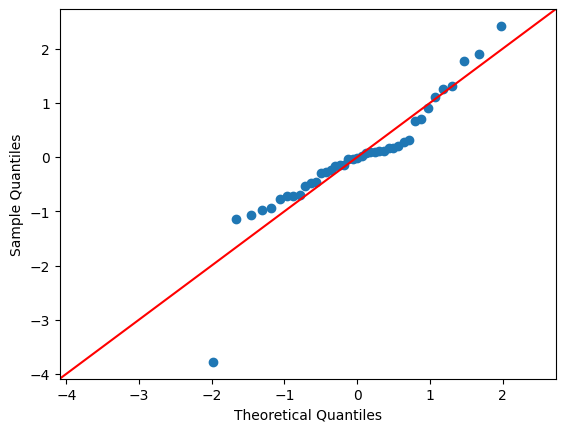

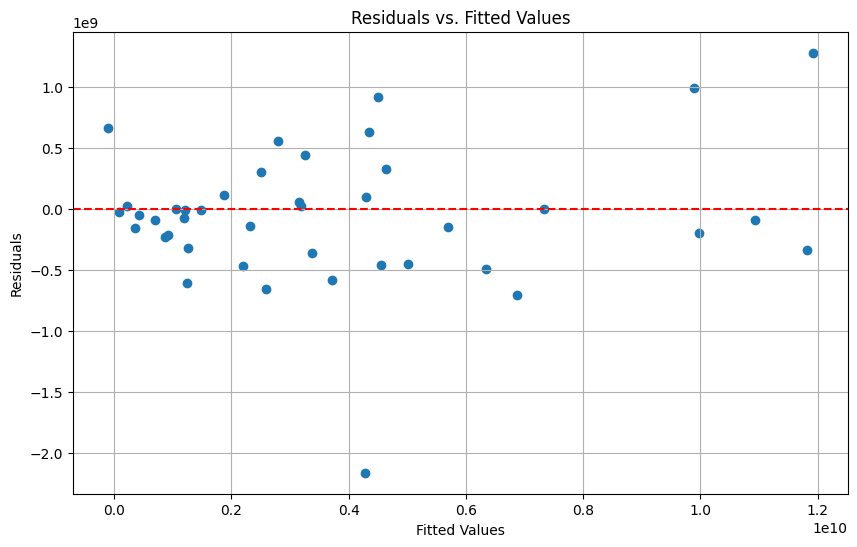

In [ ]:
residuals = regA.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(regA.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
colrevise = ['GNI, Atlas method (current US$)',
       'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US',
       'Short-term debt outstanding (DO',
       'Agriculture_CO2_interaction',
       'CO2_Emissions_Agriculture_Interaction',
       'GDP growth (annual %)_squared',
       'GNI per capita, Atlas method (c_squared',
       'Population, total_squared',
       'Surface area (sq. km)_squared']


X = df[colrevise]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regrevise = sm.OLS(y, X).fit()

print(regrevise.summary())

# Display VIF
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     84.05
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.96e-19
Time:                        19:49:06   Log-Likelihood:                -891.53
No. Observations:                  41   AIC:                             1803.
Df Residuals:                      31   BIC:                             1820.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included

In [ ]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  GNI, Atlas method (current US$) with p-value 0.0000
Add  Long-term debt (DOD, current US with p-value 0.0000
resulting features:
['GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US']


<ipython-input-168-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-168-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-168-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [ ]:
colrevise = ['GNI, Atlas method (current US$)',
       'Long-term debt (DOD, current US',]


X = df[colrevise]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regrevise1 = sm.OLS(y, X).fit()

print(regrevise1.summary())

# Display VIF
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     362.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.78e-25
Time:                        19:51:19   Log-Likelihood:                -896.36
No. Observations:                  41   AIC:                             1799.
Df Residuals:                      38   BIC:                             1804.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

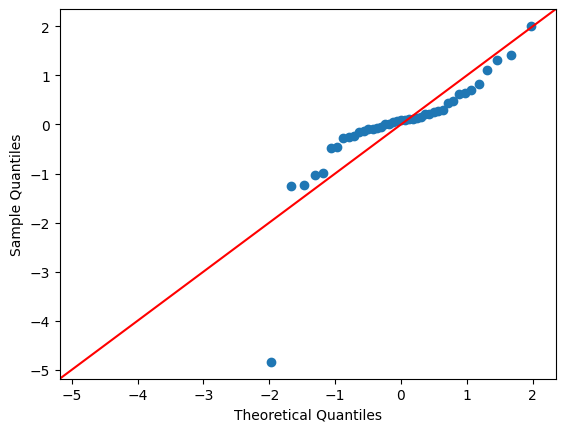

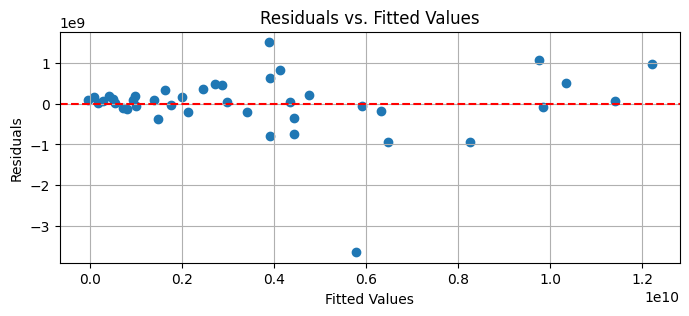

In [ ]:
# Calculate residuals
residuals = regrevise1.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(8, 3))
plt.scatter(regrevise1.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()